<a href="https://colab.research.google.com/github/Raziel-JKM/Kaggle/blob/main/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/%EC%84%9C%EC%9A%B8%EC%A2%85%ED%95%A9%EB%B3%91%EC%9B%90_%EB%B6%84%ED%8F%AC_%ED%99%95%EC%9D%B8%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[10분 pandas](https://pandas.pydata.org/pandas-docs/version/1.0.0/getting_started/10min.html)

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(
{"a" : [4, 5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = [1, 2, 3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [14]:
# # Rows 기준 예시
# df[[df.Length > 7]]


# # Columns 기준 예시
# df[['width', 'length', 'species']]


In [15]:
df["a"].value_counts() #Categorical한 값의 빈도수를 구하는 방법

6    1
5    1
4    1
Name: a, dtype: int64

In [16]:
df["a"].sort_values() # "a"컬럼을 기준으로 정렬하기

1    4
2    5
3    6
Name: a, dtype: int64

In [17]:
df.sort_values("a") #DataFrame 전체에서 "a"값을 기준으로 정렬하기

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [18]:
df.sort_values("a", ascending=False) #역순으로 정렬하기

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10


In [19]:
df = df.drop(["c"], axis=1) #"c"컬럼 drop 하기
df

,a,b
1,4,7
2,5,8
3,6,9


In [20]:
df.groupby(["a"])["b"].mean()  #"a" 컬럼값을 Groupby하여 "b"의 컬럼값 평균값 구하기 

a
4    7
5    8
6    9
Name: b, dtype: int64

In [21]:
pd.pivot_table(df, index="a") # pivot_table로 평균값 구하기 --> "a" 컬럼에 있는 값이 4가 두 개가 있기 때문에 그 값의 평균값이 적용이 됩니다.


,b
a,
4,7
5,8
6,9


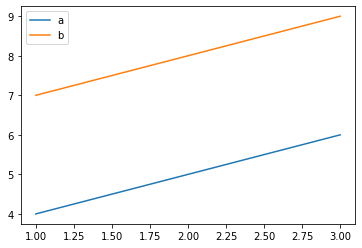

In [22]:
df.plot()

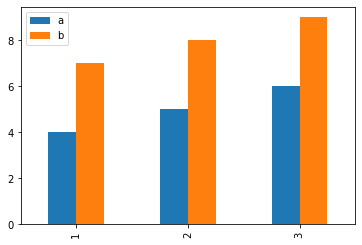

In [23]:
df.plot.bar()

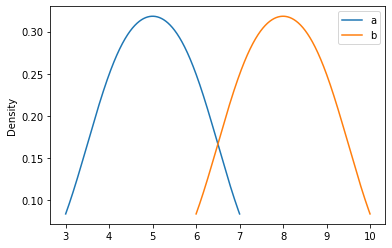

In [24]:
df.plot.density()

In [25]:
True == "1"

False

In [26]:
address = ['경기도', '성남시', '분당구', '불정로', '6', 'NAVER', '그린팩토리']

"경기" in address

False

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns # shift + enter 실행  

In [57]:
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False) #마이너스 코드 꺠짐 방짐

In [32]:
from IPython.display import set_matplotlib_formats
#폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

데이터 로드하기

In [38]:
df = pd.read_csv("/content/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
#warning low_memory= False 설정 요구

In [39]:
df.shape

(91335, 39)

In [ ]:
df.head(3)

In [ ]:
df.tail()

In [ ]:
df.info()

In [48]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

핵심 키워드

- isnull().sum()

- plot()/plot.bar()/plot.harh()

- reset_index

- sort_values()

- NaN

- drop()

In [ ]:
#결측치
df.isnull().sum()

In [ ]:
null_count = df.isnull().sum()
null_count

In [ ]:
null_count.plot.barh(figsize = (5, 7))

In [70]:
df_null_count = null_count.reset_index()#.reset_index() - 데이터 프레임 형태로 변환된다

In [71]:
df_null_count.columns = ["컬럼명","결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


정렬하기

In [77]:
df_null_count.sort_values(by="결측치수",ascending=False).head(10)
#결측치 수 많은대로 상위 10개만 출력합니다.
#상위 10개 컬럼을 _top에 담기
df_null_count_top = df_null_count.sort_values(by="결측치수",ascending=False).head(10)

특정 컬럼만 불러오기

In [75]:
df["지점명"] # nan은 Not a Number 의 약자로 결측치를 의미합니다.

0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [ ]:
#컬럼명이라는 값만 가져와서 drop_columns 라는 변수에 담습니다.
df_null_count["컬럼명"]

In [78]:
df_null_count_top["컬럼명"].tolist() #.tolist() 리스트형태로 변ㄴ경해준다
drop_columns = df_null_count_top["컬럼명"].tolist()

In [79]:
df[drop_columns].head

<bound method NDFrame.head of         지점명  동정보  건물부번지  호정보  ... 지번부번지 표준산업분류코드           표준산업분류명  시도코드
0       NaN  NaN    NaN  NaN  ...   NaN   Q86201             일반 의원  41.0
1       NaN  NaN    NaN  NaN  ...  14.0   Q86201             일반 의원  11.0
2       NaN  NaN    NaN  NaN  ...   1.0   Q86201             일반 의원  41.0
3       NaN  NaN    NaN  NaN  ...   1.0      NaN               NaN  26.0
4       수지점  NaN    NaN  NaN  ...   2.0   G47811    의약품 및 의료용품 소매업  41.0
...     ...  ...    ...  ...  ...   ...      ...               ...   ...
91330   베스트  NaN    NaN  NaN  ...   NaN   G47811    의약품 및 의료용품 소매업  30.0
91331  봄산후조  NaN    NaN  NaN  ...   NaN   S96993  개인 간병인 및 유사 서비스업  41.0
91332   NaN  NaN    NaN  NaN  ...   1.0   Q86102             일반 병원  26.0
91333   NaN  NaN    NaN  NaN  ...   9.0   Q86203               한의원  11.0
91334   NaN  NaN    NaN  NaN  ...  17.0   Q86201             일반 의원  44.0

[91335 rows x 10 columns]>

결측치 제거하기

In [82]:
print(df.shape)
df = df.drop(drop_columns, axis=1) #inplace 가능 #df = 다시 안해주면 변화없음
print(df.shape)

(91335, 39)
(91335, 29)


In [84]:
#제거결과 메모리 사용량이 줄었다.
df.info

<bound method DataFrame.info of          상가업소번호           상호명 상권업종대분류코드  ...    신우편번호          경도         위도
0      19956873        하나산부인과         S  ...  15236.0  126.814295  37.336344
1      20024149      타워광명내과의원         S  ...   6292.0  127.053198  37.488742
2      20152277     조정현신경외과의원         S  ...  15066.0  126.734841  37.344955
3      20350610      한귀원정신과의원         S  ...  48266.0  129.115438  35.166872
4      20364049     더블유스토어수지점         S  ...  16837.0  127.095522  37.323528
...         ...           ...       ...  ...      ...         ...        ...
91330  16196725         온누리약국         S  ...  35240.0  127.389865  36.352728
91331  16192180            리원         S  ...  10503.0  126.830144  37.627530
91332  16127538       참좋은요양병원         S  ...  46294.0  129.082790  35.227138
91333  16108681       경희중앙한의원         S  ...   5303.0  127.143958  37.540993
91334  16109073  천안김안과천안역본점의원         S  ...  31127.0  127.152651  36.806640

[91335 rows x 29 columns]>

https://www.boostcourse.org/ds112/lecture/59916?isDesc=false 연결해서 듣기